In [13]:
import pandas as pd
import numpy as np
from collections import Counter
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
co2 = pd.read_csv('SYB63_310_202009_Carbon Dioxide Emission Estimates.csv')
co2_1 = co2[co2['Unnamed: 3']=='Emissions (thousand metric tons of carbon dioxide)']
co2_2 = co2[co2['Unnamed: 3']=='Emissions per capita (metric tons of carbon dioxide)']
use = pd.read_csv('SYB63_314_202009_Internet Usage.csv')

In [3]:
def graph(a,b,c,d):
    
    s = a.columns[1]
    x1 = a['%s'%s]
    y1 = a['Unnamed: 4'].astype(float)
    x2 = b['%s'%s]
    y2 = b['Unnamed: 4'].astype(float)
    x3 = c['%s'%s]
    y3 = c['Unnamed: 4'].astype(float)
    x4 = d['%s'%s]
    y4 = d['Unnamed: 4'].astype(float)
  
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.plot(x1,y1)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.subplot(2,2,2)
    plt.plot(x2,y2)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.subplot(2,2,3)
    plt.plot(x3,y3)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.subplot(2,2,4)
    plt.plot(x4,y4)
    plt.xticks(rotation=90)
    plt.yticks(rotation=45)
    plt.show()


###  Standardization 표준화 함수

In [3]:
def Standardization(df):
    df['Unnamed: 4'] = (df['Unnamed: 4'] - df['Unnamed: 4'].mean())/df['Unnamed: 4'].std()
    return df['Unnamed: 4']

### 데이터 분류

In [5]:
def data(dataframe):
    dataframe.drop(['Unnamed: 5','Unnamed: 6'], axis=1)
    a = dataframe.loc[dataframe['Unnamed: 2']=='2005']
    b = dataframe.loc[dataframe['Unnamed: 2']=='2010']
    c = dataframe.loc[dataframe['Unnamed: 2']=='2015']
    d = dataframe.loc[dataframe['Unnamed: 2']=='2017']
    return a,b,c,d,pd.concat([a,b,c,d])

In [8]:
a,b,c,d,co2_1 = data(co2_1)
a1,b1,c1,d1,co2_2 = data(co2_2)
e,f,g,h,use =data(use)

In [9]:
CO2 = [a,b,c,d,a1,b1,c1,d1]
USE = [e,f,g,h]

for i in CO2:
    i['Unnamed: 4'] = i['Unnamed: 4'].apply(pd.to_numeric)
    i['Unnamed: 4'] = Standardization(i)
for i in USE:
    i['Unnamed: 4'] = i['Unnamed: 4'].apply(pd.to_numeric)
    i['Unnamed: 4'] = Standardization(i)

Emissions (thousand metric tons of carbon dioxide)


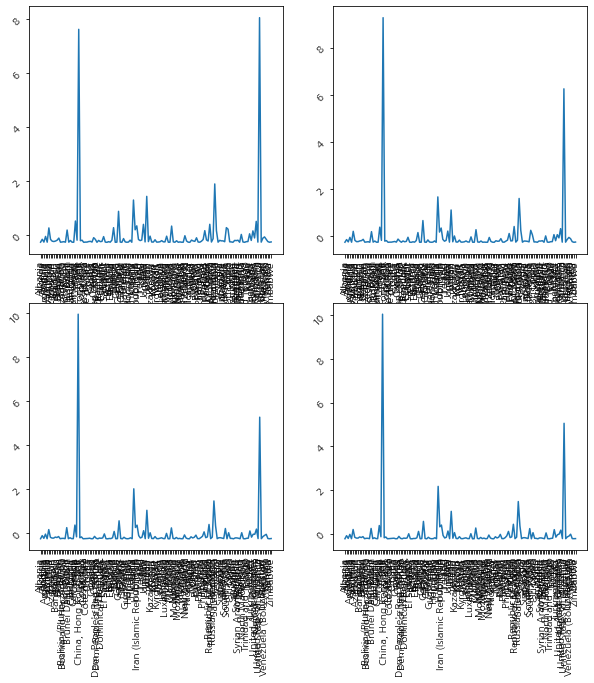

In [10]:
print('Emissions (thousand metric tons of carbon dioxide)')
graph(a,b,c,d) 

Emissions per capita (metric tons of carbon dioxide)


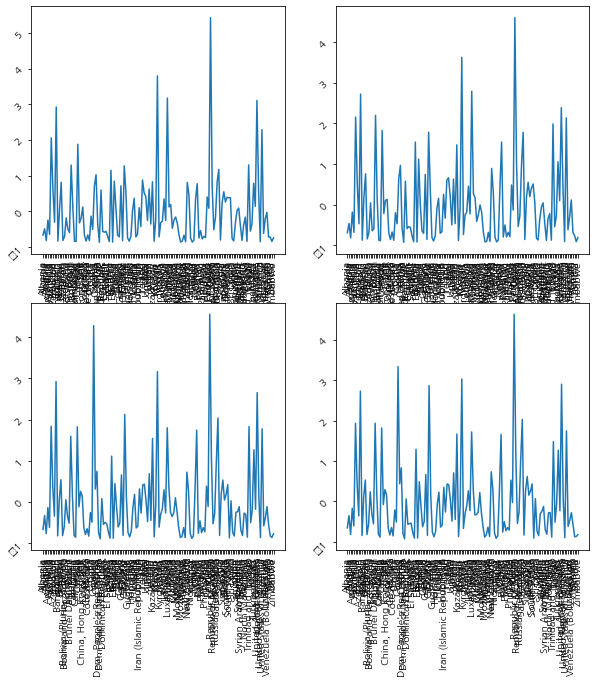

In [14]:
print('Emissions per capita (metric tons of carbon dioxide)')
graph(a1,b1,c1,d1)

Internet Usage


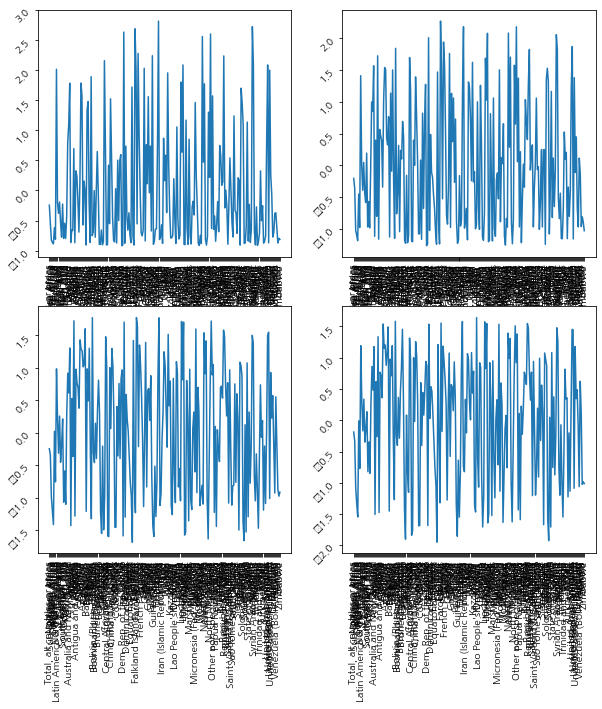

In [15]:
print('Internet Usage')
graph(e,f,g,h)

#### 2005 2010 2015 2017 나라 인구별 이산화탄소 방출
### ------------------------------------------------------------------

In [ ]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [ ]:
country = [] 
for i  in a['CO2 emission estimates']:
    for j in e['Internet Usage']:
        if i==j:
            country.append(i)
country = {'country':country}
country = pd.DataFrame(country)
country

## co2와 internet usage 비교 함수

In [ ]:
def similarity(i,j):
    result = pd.merge(i,j,left_on='CO2 emission estimates',right_on='Internet Usage')
    result = result.drop('Internet Usage',axis=1)
    return cos_sim(result['Unnamed: 4_x'].astype('float'),result['Unnamed: 4_y'].astype('float'))

## co2 특성 내에서 비교함수

In [ ]:
def a_similarity(i,j):
    result = pd.merge(i,j,left_on='CO2 emission estimates',right_on='CO2 emission estimates')
    #result = result.drop('Internet Usage',axis=1)
    return cos_sim(result['Unnamed: 4_x'].astype('float'),result['Unnamed: 4_y'].astype('float'))

In [ ]:
CO2_1 = [a,b,c,d]
CO2_2 = [a1,b1,c1,d1]

### co2 특성 내 유사도

In [ ]:
mean_ = []
for i,v in enumerate(CO2_1):
    for j,k in enumerate(CO2_2):
        v=v[['CO2 emission estimates','Unnamed: 4']]
        k=k[['CO2 emission estimates','Unnamed: 4']]
        print(a_similarity(v,k),i,j)
        mean_.append(a_similarity(v,k))
simil_mean = sum(mean_)/len(mean_)
print(simil_mean,'co2 특성 내 유사도 평균')

## co2와 internet usage 유사도

In [ ]:
mean_ = []
for i,v in enumerate(CO2):
    for j,k in enumerate(USE):
        v=v[['CO2 emission estimates','Unnamed: 4']]
        k=k[['Internet Usage','Unnamed: 4']]
        print(similarity(v,k),i,j)
        mean_.append(similarity(v,k))
simil_mean = sum(mean_)/len(mean_)
print(simil_mean, 'co2와 internet usage 유사도 평균')